# XGBRegressor with KFolds and Hyperparameter tuning

# Step 1: Import the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error

# Step 2: Load the data

In [2]:
# Kaggle - Load the training data
train = pd.read_csv("../input/30-days-of-ml/train.csv")
test = pd.read_csv("../input/30-days-of-ml/test.csv")

train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


# Step 3: Exploratory Data Analysis

In [3]:
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [4]:
test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,B,B,B,C,B,B,A,E,E,...,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
1,5,A,B,A,C,B,C,A,E,C,...,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
2,15,B,A,A,A,B,B,A,E,D,...,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
3,16,B,B,A,C,B,D,A,E,A,...,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
4,17,B,B,A,C,B,C,A,E,C,...,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412


In [5]:
# Take a copy of train in df for Exploratory Data Analysis
df = train.copy()

# Checking if there are missing values in the datasets
df.isna().sum().sum(), test.isna().sum().sum()

(0, 0)

In [6]:
df.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,144450.150010,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,1.000000,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,124772.500000,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,250002.500000,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,375226.500000,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,499999.000000,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


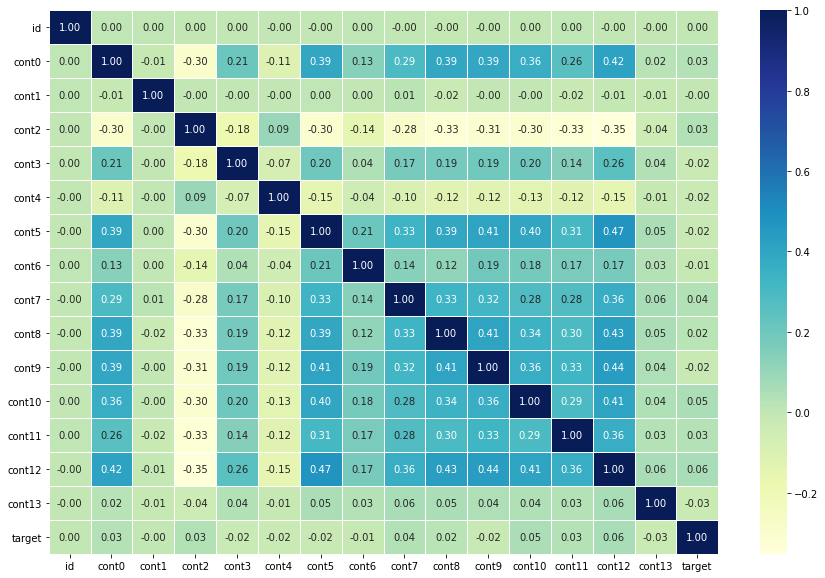

In [7]:
# Correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

# Step 4: Prepare the data

In [8]:
# Lists of categorical and numerical feature columns
cat_features = ["cat" + str(i) for i in range(10)]
num_features = ["cont" + str(i) for i in range(14)]
print(cat_features)
print(num_features)

['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']


In [9]:
# Encoding categorical features with OrdinalEncoder
for col in cat_features:
    encoder = OrdinalEncoder()
    train[col] = encoder.fit_transform(np.array(train[col]).reshape(-1, 1))
    test[col] = encoder.transform(np.array(test[col]).reshape(-1, 1))

In [10]:
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,1.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,2.0,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,1.0,1.0,0.0,0.0,1.0,3.0,0.0,5.0,0.0,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,0.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,0.0,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,1.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,2.0,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,0.0,0.0,0.0,2.0,1.0,3.0,0.0,4.0,0.0,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [11]:
test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,4.0,...,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
1,5,0.0,1.0,0.0,2.0,1.0,2.0,0.0,4.0,2.0,...,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
2,15,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0,...,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
3,16,1.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,0.0,...,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
4,17,1.0,1.0,0.0,2.0,1.0,2.0,0.0,4.0,2.0,...,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412


In [12]:
# Separate X: features and - y : target 
X = train.drop(["target"], axis=1)
X_test = test
y = train["target"]

In [13]:
X.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,1,1.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,2.0,...,0.610706,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850
1,2,1.0,1.0,0.0,0.0,1.0,3.0,0.0,5.0,0.0,...,0.276853,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083
2,3,0.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,0.0,...,0.285074,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846
3,4,1.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,2.0,...,0.284667,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682
4,6,0.0,0.0,0.0,2.0,1.0,3.0,0.0,4.0,0.0,...,0.287595,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823


In [14]:
X_test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,4.0,4.0,...,0.476739,0.376350,0.337884,0.321832,0.445212,0.290258,0.244476,0.087914,0.301831,0.845702
1,5,0.0,1.0,0.0,2.0,1.0,2.0,0.0,4.0,2.0,...,0.285509,0.860046,0.798712,0.835961,0.391657,0.288276,0.549568,0.905097,0.850684,0.693940
2,15,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0,...,0.697272,0.683600,0.404089,0.879379,0.275549,0.427871,0.491667,0.384315,0.376689,0.508099
3,16,1.0,1.0,0.0,2.0,1.0,3.0,0.0,4.0,0.0,...,0.719306,0.777890,0.730954,0.644315,1.024017,0.391090,0.988340,0.411828,0.393585,0.461372
4,17,1.0,1.0,0.0,2.0,1.0,2.0,0.0,4.0,2.0,...,0.313032,0.431007,0.390992,0.408874,0.447887,0.390253,0.648932,0.385935,0.370401,0.900412


In [15]:
y.head()

0    8.113634
1    8.481233
2    8.364351
3    8.049253
4    7.972260
Name: target, dtype: float64

In [16]:
X.shape, y.shape

((300000, 25), (300000,))

# Step 5: Create KFolds and train model per fold


In [17]:
# X.info()

In [18]:
# y

In [19]:
# Model hyperparameters
# With xgb_params_mahtab_new and GPU flags off - Overall RMSE: 
# Private Test score - 
# Public Test score - 
xgb_params_mahtab_new_two = {
              'random_state': 1,
              'objective': 'reg:squarederror',
              'n_jobs': -1,
              
               # Only test with these parameters
               #'gpu_id': 0,
               #'predictor': 'gpu_predictor',
               #'tree_method': 'gpu_hist',
               # Only test with these parameters        
               'n_estimators': 10000,  
               
               'colsample_bytree': 0.10846937353161965,
               'learning_rate': 0.013677172081628455,
               'max_depth': 5,
               'reg_alpha': 23.99638282497684,
               'reg_lambda': 0.2054555005956808,
               'subsample': 0.8343156327805082
            }

# With xgb_params_mahtab_new and GPU flags off - Overall RMSE: 0.7170603751460398
# Private Test score - 0.71675
# Public Test score - 0.71829
# xgb_params_mahtab_new = {
#               'random_state': 1,
#               'objective': 'reg:squarederror',
#               'n_jobs': -1,
              
#                # Only test with these parameters
#                #'gpu_id': 0,
#                #'predictor': 'gpu_predictor',
#                #'tree_method': 'gpu_hist',
#                # Only test with these parameters        
#                'n_estimators': 10000,  
# 
#                'colsample_bytree': 0.15295565051931906,
#                'learning_rate': 0.044799221763401044,
#                'max_depth': 3,
#                'reg_alpha': 1.612060712380982e-08,
#                'reg_lambda': 55.58655765424458,
#                'subsample': 0.8201468718044387
#                 }

# Best score so far
# xgb_params = {'n_estimators': 10000,
#               'objective': 'reg:squarederror',
#               'learning_rate': 0.35,
#               'subsample': 0.926,
#               'colsample_bytree': 0.84,
#               'max_depth': 2,
#               'booster': 'gbtree', 
#               'reg_lambda': 35.1,
#               'reg_alpha': 34.9,
#               'random_state': 1,
#               'n_jobs': 4}

# # Model hyperparameters
# xgb_params = {
#             'gpu_id': 0,
#             'learning_rate': 0.05,
#             'n_estimators': 2500,
#             'objective': 'reg:squarederror',
#             'predictor': 'gpu_predictor',
#             'tree_method': 'gpu_hist'
#             }

# # Model hyperparameters
# xgb_params = {'n_estimators': 10000,
#               'objective': 'reg:squarederror',
#               'learning_rate': 0.35,
#               'subsample': 0.926,
#               'colsample_bytree': 0.84,
#               'max_depth': 2,
#               'booster': 'gbtree', 
#               'reg_lambda': 35.1,
#               'reg_alpha': 34.9,
#               'random_state': 1,
#               'objective': 'reg:squarederror',
#               'predictor': 'gpu_predictor',
#               'tree_method': 'gpu_hist'
#             }

In [20]:
# Started with 10 splits
splits=10
kf = KFold(n_splits=splits, random_state=1, shuffle=True)
preds = 0
total_mean_rmse = 0

for num, (train_idx, valid_idx) in enumerate(kf.split(X)):
  X_train, X_valid = X.reindex(train_idx), X.reindex(valid_idx)
  y_train, y_valid = y.reindex(train_idx), y.reindex(valid_idx)
  
  print(f"KFold no. {num} | Lengths:train-valid X:{len(X_train)}-{len(X_valid)} y:{len(y_train)}-{len(y_valid)}")

  # model = XGBRegressor(**xgb_params)
  # model = XGBRegressor(**xgb_params_mahtab_new)
  model = XGBRegressor(**xgb_params_mahtab_new_two)
  
  model.fit(X_train, y_train,
            verbose=0,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],
            eval_metric="rmse",
            early_stopping_rounds=100)

  # Getting mean test data predictions (i.e. devided by number of splits)
  preds += model.predict(X_test) / splits

  # Getting score for a fold model
  preds_valid = model.predict(X_valid)
  fold_rmse = mean_squared_error(y_valid, preds_valid, squared=False)
  print(f"KFold no. {num} RMSE: {fold_rmse}")

  # Getting mean score of all fold models (i.e. devided by number of splits)
  total_mean_rmse += fold_rmse / splits
  
  print("------------------")

print(f"\nOverall RMSE: {total_mean_rmse}")
print(f"Preds is {preds}")

KFold no. 0 | Lengths:train-valid X:270000-30000 y:270000-30000


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


KFold no. 0 RMSE: 0.7135080116874937
------------------
KFold no. 1 | Lengths:train-valid X:270000-30000 y:270000-30000


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


KFold no. 1 RMSE: 0.7144886800182437
------------------
KFold no. 2 | Lengths:train-valid X:270000-30000 y:270000-30000


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


KFold no. 2 RMSE: 0.7184451601324285
------------------
KFold no. 3 | Lengths:train-valid X:270000-30000 y:270000-30000


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


KFold no. 3 RMSE: 0.7252672040288768
------------------
KFold no. 4 | Lengths:train-valid X:270000-30000 y:270000-30000


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


KFold no. 4 RMSE: 0.7178025441489291
------------------
KFold no. 5 | Lengths:train-valid X:270000-30000 y:270000-30000


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


KFold no. 5 RMSE: 0.7162601327848712
------------------
KFold no. 6 | Lengths:train-valid X:270000-30000 y:270000-30000


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


KFold no. 6 RMSE: 0.7145810666531236
------------------
KFold no. 7 | Lengths:train-valid X:270000-30000 y:270000-30000


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


KFold no. 7 RMSE: 0.7189410663992104
------------------
KFold no. 8 | Lengths:train-valid X:270000-30000 y:270000-30000


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


KFold no. 8 RMSE: 0.7141368510825743
------------------
KFold no. 9 | Lengths:train-valid X:270000-30000 y:270000-30000


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


KFold no. 9 RMSE: 0.7101209324151797
------------------

Overall RMSE: 0.716355164935093
Preds is [8.047777  8.35108   8.378222  ... 8.506913  8.149306  7.9486876]


In [21]:
# With xgb_params_mahtab_new and GPU flags on - Overall RMSE: 0.7177600520042775
# With xgb_params_mahtab_new and GPU flags off - Overall RMSE: 0.7170603751460398

# Step 5: Submit to the competition

In [22]:
# Make a submission dataframe and populate
predictions = pd.DataFrame()
predictions["id"] = test["id"]
predictions["target"] = preds

predictions.to_csv('submission.csv', index=False, header=predictions.columns)
predictions.head()

,id,target
0,0,8.047777
1,5,8.351080
2,15,8.378222
3,16,8.478135
4,17,8.131965


In [23]:
predictions

,id,target
0,0,8.047777
1,5,8.351080
2,15,8.378222
3,16,8.478135
4,17,8.131965
...,...,...
199995,499987,8.010525
199996,499990,8.462091
199997,499991,8.506913
199998,499994,8.149306


Once you have run the code cell above, follow the instructions below to submit to the competition:
1. Begin by clicking on the **Save Version** button in the top right corner of the window.  This will generate a pop-up window.  
2. Ensure that the **Save and Run All** option is selected, and then click on the **Save** button.
3. This generates a window in the bottom left corner of the notebook.  After it has finished running, click on the number to the right of the **Save Version** button.  This pulls up a list of versions on the right of the screen.  Click on the ellipsis **(...)** to the right of the most recent version, and select **Open in Viewer**.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
4. Click on the **Output** tab on the right of the screen.  Then, click on the file you would like to submit, and click on the **Submit** button to submit your results to the leaderboard.

You have now successfully submitted to the competition!

If you want to keep working to improve your performance, select the **Edit** button in the top right of the screen. Then you can change your code and repeat the process. There's a lot of room to improve, and you will climb up the leaderboard as you work.

# Step 6: Keep Learning!

If you're not sure what to do next, you can begin by trying out more model types!
1. If you took the **[Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning)** course, then you learned about **[XGBoost](https://www.kaggle.com/alexisbcook/xgboost)**.  Try training a model with XGBoost, to improve over the performance you got here.

2. Take the time to learn about **Light GBM (LGBM)**, which is similar to XGBoost, since they both use gradient boosting to iteratively add decision trees to an ensemble.  In case you're not sure how to get started, **[here's a notebook](https://www.kaggle.com/svyatoslavsokolov/tps-feb-2021-lgbm-simple-version)** that trains a model on a similar dataset.